# Project02-Shark Attacks

## Importación de librerias

In [22]:
import pandas as pd
import numpy as np
import re
import matplotlib as mt

## Lectura del documento

In [23]:
df=pd.read_csv("/Users/joanu/Clases Ironhack/notebooks/data/attacks.csv",encoding="latin-1")

##### Resumen alto nivel de las características del Data Set

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

##### Idenfificación del número total de observaciones del Data Set

In [25]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

## Data Cleaning por Columnas

### Análisis de elementos nulos en las columnas

#####  Identificación de aquellas columnas pueden ser eliminadas debido al contenido nulo de estas, para ello identificaremos el % de nulos existentes de cada columna
- Columnas a eliminar:
 - Unnamed: 22
 - Unnamed: 23

In [26]:
df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Guardar para mas adelante
df=df[['pdf','Case Number','Date','Year','Type','Country','Area','Name','Sex ','Species ','Investigator or Source','href','href formula','Case Number.1','Case Number.2','original order','Unnamed: 22','Unnamed: 23']]
df

In [ ]:
# Drop todas aquellas columnas que nos han servido para comparar algo (comparision href,case number,etc)

In [27]:
df.drop(['Case Number'],axis=1,inplace=True)
df

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df.dropna(how="all",inplace=True)
df

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6306.0,NaN,NaN
6305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6307.0,NaN,NaN
6306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6308.0,NaN,NaN
6307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0,NaN,NaN


In [29]:
df.drop([6302,6303,6304,6305,6306,6307,6308],axis=0,inplace=True)
df

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
6298,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
6299,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
6300,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN


In [30]:
df.drop_duplicates()
df

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
6298,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
6299,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
6300,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN


In [31]:
df.columns

Index(['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity',
       'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ',
       'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [32]:
null_cols =df.isnull().sum()
null_cols

Date                         0
Year                         2
Type                         4
Country                     50
Area                       455
Location                   540
Activity                   544
Name                       210
Sex                        565
Age                       2831
Injury                      28
Fatal (Y/N)                539
Time                      3354
Species                   2838
Investigator or Source      17
pdf                          0
href formula                 1
href                         0
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               6301
Unnamed: 23               6300
dtype: int64

In [33]:
notnull_cols =df.notnull().sum()
notnull_cols

Date                      6302
Year                      6300
Type                      6298
Country                   6252
Area                      5847
Location                  5762
Activity                  5758
Name                      6092
Sex                       5737
Age                       3471
Injury                    6274
Fatal (Y/N)               5763
Time                      2948
Species                   3464
Investigator or Source    6285
pdf                       6302
href formula              6301
href                      6302
Case Number.1             6302
Case Number.2             6302
original order            6302
Unnamed: 22                  1
Unnamed: 23                  2
dtype: int64

In [34]:
Percentage_nulls=null_cols/(null_cols+notnull_cols)
Percentage_nulls

Date                      0.000000
Year                      0.000317
Type                      0.000635
Country                   0.007934
Area                      0.072199
Location                  0.085687
Activity                  0.086322
Name                      0.033323
Sex                       0.089654
Age                       0.449222
Injury                    0.004443
Fatal (Y/N)               0.085528
Time                      0.532212
Species                   0.450333
Investigator or Source    0.002698
pdf                       0.000000
href formula              0.000159
href                      0.000000
Case Number.1             0.000000
Case Number.2             0.000000
original order            0.000000
Unnamed: 22               0.999841
Unnamed: 23               0.999683
dtype: float64

### Análisis de posibles columnas duplicadas:
 - href formula
 - href

In [35]:
# A pesar de que el 99% de los valores son iguales, existe un 1% con diferente información por lo que no lo conisderamos duplicado
df["del_Comparison_href"]=df["href formula"]==df["href"]
df["del_Comparison_href"].value_counts()

True     6242
False      60
Name: del_Comparison_href, dtype: int64

In [ ]:
# funcion duplicate, eliminar duplicados

### Eliminación de columnas inecesarias

In [36]:
df.columns

Index(['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity',
       'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ',
       'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23', 'del_Comparison_href'],
      dtype='object')

In [37]:
# Se han eliminado las columnas:'Unnamed: 22','Unnamed: 23','Case Number.1','Case Number.2'
df.drop(['Unnamed: 22','Unnamed: 23','Case Number.1','Case Number.2'],axis=1,inplace=True)
df

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,original order,del_Comparison_href
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0,True
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0,True
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0,True
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0,True
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6.0,True
6298,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5.0,True
6299,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,4.0,True
6300,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,3.0,True


In [ ]:
# Esperar para borrar al final la columna del_Comparison_href
df.drop(['del_Comparison_CN1','del_Comparison_CN'],axis=1,inplace=True)
df

### Análisis de elementos de las columnas

##### Year
##### Acciones a realizar:
 - Modificación de los elementos de tipo float a int
 - Modificación de NaN por No date

In [38]:
# He tratado realizar una modificación de los tipos de elementos de float a int pero no ha sido posible.
# He optado por la utilización de regex tomando en cuenta la información correspondiente a la columna
df["Year"]=df['Date'].str.findall("(\d{4}$)").str.join('')
df.fillna("No date")

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,original order,del_Comparison_href
0,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0,True
1,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,No date,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0,True
2,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,No date,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0,True
3,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,No date,Minor injury to lower leg,N,No date,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0,True
4,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,No date,Lacerations to leg & hand shark PROVOKED INCIDENT,N,No date,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,Before 1903,1903,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,No date,FATAL,Y,No date,No date,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6.0,True
6298,Before 1903,1903,Unprovoked,AUSTRALIA,Western Australia,No date,Pearl diving,Ahmun,M,No date,FATAL,Y,No date,No date,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5.0,True
6299,1900-1905,1905,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,No date,FATAL,Y,No date,No date,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,4.0,True
6300,1883-1889,1889,Unprovoked,PANAMA,No date,"Panama Bay 8ºN, 79ºW",No date,Jules Patterson,M,No date,FATAL,Y,No date,No date,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,3.0,True


In [18]:
df

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,original order,del_Comparison_href
0,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0,True
1,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0,True
2,09-Jun-2018,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0,True
3,08-Jun-2018,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0,True
4,04-Jun-2018,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,Before 1903,1903,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6.0,True
6298,Before 1903,1903,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5.0,True
6299,1900-1905,1905,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,4.0,True
6300,1883-1889,1889,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,3.0,True


##### Date
##### Acciones a realizar:
 - Observamos que el formato fecha no es el correcto, mientras si lo es el de la columna pdf, por lo que eliminaremos esta columna.

In [39]:
df.drop(['Date'],axis=1,inplace=True)
df

,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,original order,del_Comparison_href
0,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0,True
1,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0,True
2,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0,True
3,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0,True
4,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,1903,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6.0,True
6298,1903,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5.0,True
6299,1905,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,4.0,True
6300,1889,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,3.0,True


##### Type
##### Acciones a realizar:
 - Homogenización de las categorías, se podrían juntar los siguientes elementos a Boating:
   - Boat
   - Boatomg

In [40]:
# Observamos que se han creado distintas categorías para navegar en barca
df["Type"].value_counts().head(60)

Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: Type, dtype: int64

In [41]:
df['Type'].replace({'Boat':'Boating'},inplace=True)
df['Type'].replace({'Boatomg':'Boating'},inplace=True)
df["Type"].value_counts().head(60)

Unprovoked      4595
Provoked         574
Invalid          547
Boating          341
Sea Disaster     239
Questionable       2
Name: Type, dtype: int64

##### Country
##### No se requieren acciones necesarias:
 - Tras analizar la información, observamos que los datos de esta columna son los correctos y no requieren de modificaciones

In [42]:
df["Country"].value_counts().head(10)

# Columna correcta, no es necesario limpiar

USA                 2229
AUSTRALIA           1338
SOUTH AFRICA         579
PAPUA NEW GUINEA     134
NEW ZEALAND          128
BRAZIL               112
BAHAMAS              109
MEXICO                89
ITALY                 71
FIJI                  62
Name: Country, dtype: int64

In [43]:
df['Country'].replace({'YEMEN ':'YEMEN'},inplace=True)
df['Country'].replace({' YEMEN':'YEMEN'},inplace=True)
df['Country'].replace({'TONGA ':'TONGA'},inplace=True)
df['Country'].replace({'SUDAN?':'SUDAN'},inplace=True)
df['Country'].replace({'MEXICO ':'MEXICO'},inplace=True)
df['Country'].replace({'NICARAGUA ':'NICARAGUA'},inplace=True)
df['Country'].replace({'PACIFIC OCEAN ':'PACIFIC OCEAN'},inplace=True)
df['Country'].replace({'DIEGO GARCIA':'UNKNOWN'},inplace=True)
df["Country"].value_counts().head(10)

USA                 2229
AUSTRALIA           1338
SOUTH AFRICA         579
PAPUA NEW GUINEA     134
NEW ZEALAND          128
BRAZIL               112
BAHAMAS              109
MEXICO                90
ITALY                 71
FIJI                  62
Name: Country, dtype: int64

In [ ]:
pd.unique(df["Country"])

##### Area
##### No se requieren acciones necesarias:
 - Tras analizar la información, observamos que los datos de esta columna son los correctos y no requieren de modificaciones

In [44]:
df["Area"].value_counts()
# Columna correcta, no es necesario limpiar

Florida                1037
New South Wales         486
Queensland              311
Hawaii                  298
California              290
                       ... 
St Helena                 1
La Saline-les-Bains       1
Estuaire Province         1
Clearwater Bay            1
Caroline Islands          1
Name: Area, Length: 825, dtype: int64

##### Location
##### No se requieren acciones necesarias:
 - Tras analizar la información, observamos que los datos de esta columna son los correctos y no requieren de modificaciones

In [45]:
df["Location"].value_counts().head(10)
# Columna correcta, no es necesario limpiar

New Smyrna Beach, Volusia County                 163
Daytona Beach, Volusia County                     30
Ponce Inlet, Volusia County                       20
Melbourne Beach, Brevard County                   18
Myrtle Beach, Horry County                        17
Durban                                            16
Isle of Palms, Charleston County                  14
Boa Viagem, Recife                                14
Cocoa Beach, Brevard County                       12
Ponce Inlet, New Smyrna Beach, Volusia County     12
Name: Location, dtype: int64

##### Activity
##### Acciones a realizar:
 - Homogenización de categorías mediante:
  - Reemplzao manual (misma categoría mal redactada)
  - Creación de categoría nueva,'Other', que agrupa todas aquellas actividades que hayan tenido una recurrencia menor a 5.
 - Con esta homogenización hemos pasado de 1533 categorías únicas a tan sólo 64.

In [46]:
# Reemplazo manual
df['Activity'].replace({'Swimming ':'Swimming'},inplace=True)
df['Activity'].replace({'Fishing ':'Fishing'},inplace=True)
df['Activity'].replace({'Surf skiing':'Surf-skiing'},inplace=True)
df['Activity'].replace({'Surf skiing ':'Surf-skiing'},inplace=True)

# Creación de categoría Other
df.loc[df['Activity'].isin((df['Activity'].value_counts()[df['Activity'].value_counts() < 5]).index), 'Activity'] = 'Other'

df["Activity"].value_counts().head(10)

Other           1699
Surfing          971
Swimming         916
Fishing          444
Spearfishing     333
Bathing          162
Wading           149
Diving           127
Standing          99
Snorkeling        89
Name: Activity, dtype: int64

In [47]:
len(df['Activity'].unique()) # Categorías Únicas

64

##### Name
##### Acciones a realizar:
- Existencia de datos sesgados que deben ser corregidos, los siguientes son solo unos pocos del total:
  - male
  - female
  - boy
  - 2 males
  - boat



In [48]:
df["Name"].value_counts().head(10)

male         550
female        97
boy           23
2 males       16
boat          14
child         12
sailor        10
males         10
Anonymous     10
a sailor       8
Name: Name, dtype: int64

In [51]:
# Es muy poco frecuente que a una misma persona le ataque un tiburon más de 2 veces
# Además se ha visto que muchos de los elementos mas de dos veces repetidos no corresponden a identidades propias
df.loc[df['Name'].isin((df['Name'].value_counts()[df['Name'].value_counts() > 2]).index), 'Name'] = 'Unknown'

##### Sex
##### Acciones a realizar:
- Modificar el nombre de la columna (sobra un espacio)
- Eliminar aquellos elementos que no sean acronimos de Sex:
  - N
  - lli
- Modificar aquellos elementos en que el acrónimo sea correcto pero exista un espacio innecesario

In [54]:
df["Sex"].value_counts().head(60)

M      5096
F       637
N         2
lli       1
.         1
Name: Sex, dtype: int64

In [53]:
df.rename(columns={"Sex ":"Sex"}, inplace=True)
df['Sex'].replace({'M ':'M'},inplace=True)

In [55]:
df[df['Sex'] == 'N'] # Filtrando el dato N vemos que el sexo corresponde a Male en los dos casos
df['Sex'].replace({'N':'M'},inplace=True)

In [56]:
df[df['Sex'] == 'lli']# Filtrando el dato lli vemos que el sexo corresponde a Male(Brian Kang)
df['Sex'].replace({'lli':'M'},inplace=True)

In [57]:
df[df['Sex'] == '.'] # Filtrando el dato '.' vemos que se desconoce el sexo de la victima
df['Sex'].replace({'.':'Unknown'},inplace=True)

##### Age
##### Acciones a realizar:
- Modificar aquellos elementos que esten en formato string, mediante la utilización de Regex
- Creación de nueva columna que agrupa los rangos de edades

In [58]:
df["Age"].value_counts().head(10)
# Podrías hacer nueva columna si es menor o mayor de edad

17    154
18    150
19    142
20    141
15    139
16    138
21    119
22    117
25    108
24    106
Name: Age, dtype: int64

In [59]:
df['Age'] = df['Age'].apply(pd.to_numeric, errors='coerce')
age_categories = ["0-18", "19-36", "37-55", "55-75", "76<"]

limits = [19,37,51,65,76]

df['Age_Range'] = pd.cut(df['Age'],5 , labels=age_categories)

df['Age_Range'].value_counts()

19-36    1495
0-18     1055
37-55     610
55-75     182
76<        27
Name: Age_Range, dtype: int64

##### Injury
##### No se requieren acciones necesarias:
 - Tras analizar la información, observamos que los datos de esta columna son los correctos y no requieren de modificaciones                            
    

In [60]:
df["Injury"].value_counts(60)

FATAL                                                     0.127829
Survived                                                  0.015461
Foot bitten                                               0.013867
No injury                                                 0.013070
Leg bitten                                                0.011476
                                                            ...   
 FATAL                                                    0.000159
Laceration to left upper leg                              0.000159
Injuries to leg, left arm & both hands                    0.000159
"Savagely bitten" but apparently survived                 0.000159
Lacerations to thigh by netted shark PROVOKED INCIDENT    0.000159
Name: Injury, Length: 3737, dtype: float64

##### Fatal (Y/N)
##### Acciones a realizar:
- Transformar aquellos elementos que sean acronimos incorrectos a correctos:
  - y
  - M
  - 2017
- Modificar aquellos elementos en que el acrónimo sea correcto pero exista un espacio innecesario ( N) o (N )

In [61]:
df["Fatal (Y/N)"].value_counts().head(60)

N          4293
Y          1388
UNKNOWN      71
 N            7
2017          1
M             1
y             1
N             1
Name: Fatal (Y/N), dtype: int64

In [62]:
df.rename(columns={"Fatal (Y/N)":"Fatal"}, inplace=True)
df['Fatal'].replace({' N':'N'},inplace=True)
df['Fatal'].replace({'N ':'N'},inplace=True)
df[df['Fatal'] == '2017']
df['Fatal'].replace({'2017':'N'},inplace=True)
df[df['Fatal'] == 'M']
df['Fatal'].replace({'M':'N'},inplace=True)
df['Fatal'].replace({'y':'Y'},inplace=True)

df['Fatal'].value_counts()

N          4303
Y          1389
UNKNOWN      71
Name: Fatal, dtype: int64

##### Time
##### No se requieren acciones necesarias:
 - Tras analizar la información, observamos que los datos de esta columna son los correctos y no requieren de modificaciones  

In [47]:
df["Time"].value_counts()

Afternoon         187
11h00             128
Morning           121
12h00             109
15h00             108
                 ... 
12h54               1
11h53               1
10h00 or 14h00      1
13h53               1
14h34               1
Name: Time, Length: 366, dtype: int64

##### Species
##### Acciones realizadas:
 - Modificación del nombre de la columna, existia un espacio innecesario
 - Homogenización de datos que contenían al menos una vez la palabra shark
 - Creación de categoría Common Shark

In [63]:
df["Species "].value_counts()

White shark                                           163
Shark involvement prior to death was not confirmed    105
Invalid                                               102
Shark involvement not confirmed                        88
Tiger shark                                            73
                                                     ... 
Two 3 m [10'] oceanic whitetip sharks                   1
nurse shark                                             1
Tiger sharks, 2.4 m to 4.9 m [8' to 16']                1
 white shark, 15'                                       1
Bull shark, 12'                                         1
Name: Species , Length: 1549, dtype: int64

In [64]:
df.rename(columns={"Species ":"Species"}, inplace=True)

In [65]:
df['Species'].str.findall('((?:\w{3,} )?[s|S]hark)').str.join('').str.lower().value_counts().head(20)
df.loc[df['Species'].isin((df['Species'].value_counts()[df['Species'].value_counts() < 2]).index), 'Species'] = 'Shark'
df['Species'].replace({'Shark':'Common Shark'},inplace=True)
df["Species"].value_counts().head(5)

Common Shark                                          1217
White shark                                            163
Shark involvement prior to death was not confirmed     105
Invalid                                                102
Shark involvement not confirmed                         88
Name: Species, dtype: int64

In [75]:
df['pdf']=df['pdf'].str.findall("(\d{4}.\d{2}.\d{2})").str.join('').head(30)
df.rename(columns={"pdf":"Date"}, inplace=True)
df

,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species,Investigator or Source,Date,href formula,href,original order,del_Comparison_href,Age_Range
0,2018,Boating,USA,California,"Oceanside, San Diego County",Other,Julie Wolfe,F,57.0,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0,True,55-75
1,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11.0,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0,True,0-18
2,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48.0,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0,True,37-55
3,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,Unknown,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0,True,NaN
4,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,1903,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,Unknown,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6.0,True,NaN
6298,1903,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5.0,True,NaN
6299,1905,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,4.0,True,NaN
6300,1889,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,3.0,True,NaN


## Data Visualization

### Attacks by Age Range

<AxesSubplot:title={'center':'Attacks by Age Range'}, xlabel='Age_Range'>

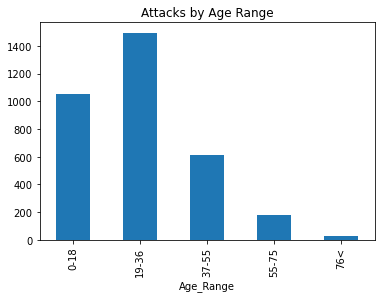

In [73]:
Age_Range=df.groupby(['Age_Range']).size()

Age_Range.plot(kind = 'bar', title = 'Attacks by Age Range')

### Attacks by Country

<AxesSubplot:title={'center':'Attacks by Country'}>

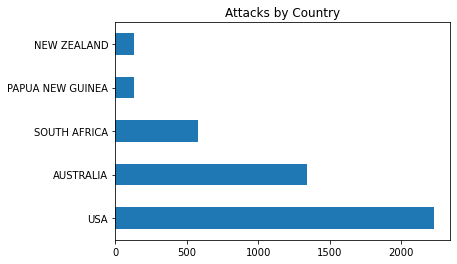

In [87]:
Country=df["Country"].value_counts().head(5)
Country_Attacks
Country_Attacks.plot(kind = 'barh', title = 'Attacks by Country')

### Attacks by Sex

<AxesSubplot:title={'center':'Attacks by Sex'}, ylabel='None'>

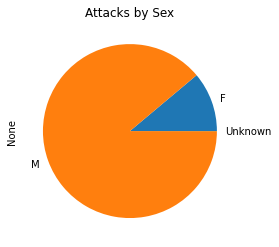

In [90]:
Attacks_by_sex=df.groupby(['Sex']).size()

Attacks_by_sex.plot(kind = 'pie', title = 'Attacks by Sex')

### Fatal Attacks

<AxesSubplot:title={'center':'Fatal_Attacks'}, ylabel='None'>

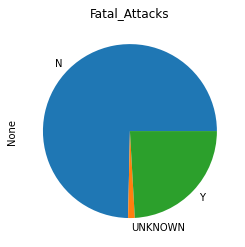

In [89]:
Fatal_Attacks=df.groupby(['Fatal']).size()

Fatal_Attacks.plot(kind = 'pie', title = 'Fatal_Attacks')

In [91]:
df.to_csv('Final.csv')